Q1. What is the mathematical formula for a linear SVM?

Answer1. 
The mathematical formula for a linear Support Vector Machine (SVM) is based on the equation of a hyperplane. Given a set of training data points (xi,yi) where xi is the feature vector and yi is the class label (-1 or 1 for binary classification), the formula for a linear SVM is:

f(x) = sign (<w,x>+b)

where:

- f(x) is the decision function that predicts the class label for a new data point x
- w is the weight vector that represents the coefficients of the hyperplane.
- b is the bias term (also called the intercept).
- ⟨w,x⟩ represents the dot product of w and x.


Q2. What is the objective function of a linear SVM?

Answe2.

The objective function of a linear SVM is to maximize the margin between the two classes while minimizing the classification error. It is typically formulated as a constrained optimization problem:

Minimize 1/2 ∥w∥^2

Subject to: yi(⟨w,xi⟩+b) ≥ 1 for all training samples (xi,yi)

Here, ∥w∥ represents the Euclidean norm of the weight vector w, and the constraints ensure that data points are correctly classified and lie on or beyond the margin.


Q3. What is the kernel trick in SVM?

Answer3. 

The kernel trick is a technique used in SVM to transform data into a higher-dimensional feature space without explicitly calculating the transformed feature vectors. It allows linearly inseparable data in the original space to become linearly separable in the transformed space. The kernel function K(x,x') calculates the inner product between two data points x and x′ in the higher-dimensional space.

Common kernel functions include the linear kernel, polynomial kernel, radial basis function (RBF) kernel, and sigmoid kernel. The choice of kernel function depends on the specific problem and the shape of the data distribution.

Q4. What is the role of support vectors in SVM Explain with example


Answer4. Support vectors are the data points from the training set that lie closest to the decision boundary (the hyperplane) in the feature space. They are the most critical data points for defining the decision boundary and margin in SVM. Here's their role explained with an example:

Example: Consider a binary classification problem with two classes, A and B. Support vectors are the data points closest to the decision boundary. In this case, imagine three support vectors: two from class A and one from class B. These support vectors are responsible for defining the hyperplane that maximizes the margin between the classes. All other data points are not as important in determining the location of the hyperplane.

Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?

Answer5.

Hyperplane (Linear SVM): This is the standard SVM with a linear kernel and a margin that separates the classes.

Marginal Plane: This is a linear SVM with a smaller margin, making it more tolerant to misclassifications.

Soft Margin: This is a linear SVM with regularization (small C value) that allows misclassifications and leads to a wider margin.

Hard Margin: This is a linear SVM with a very large C value, enforcing a strict margin. It may not work well for this data because it tries to minimize misclassifications at the expense of a narrow margin.

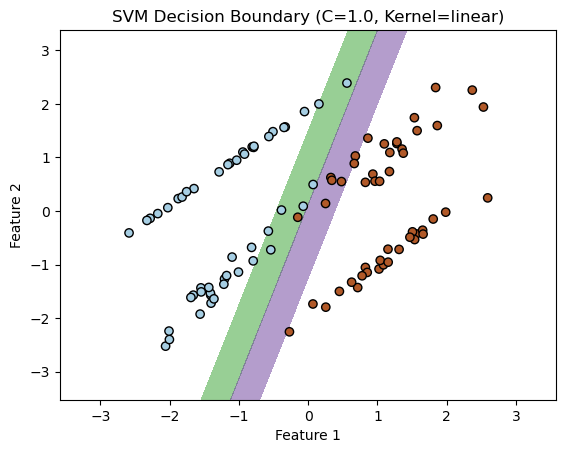

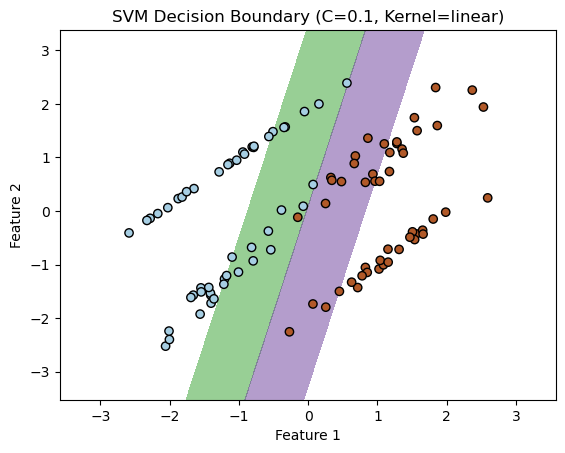

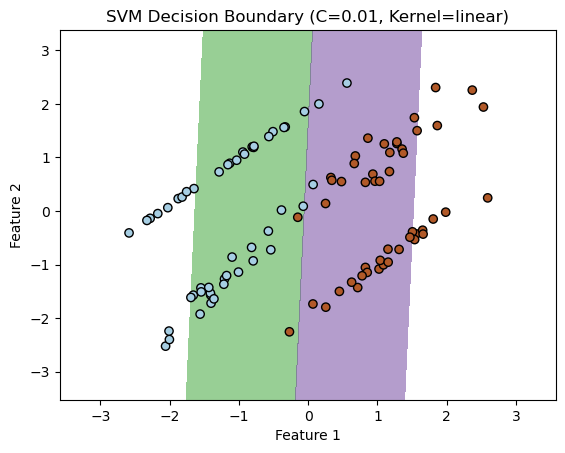

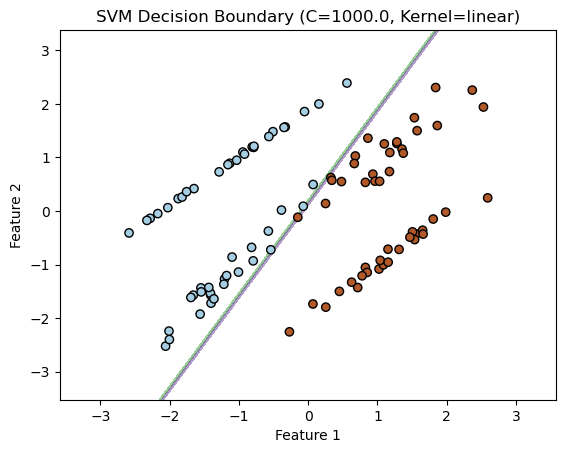

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Generate synthetic data
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Define a function to plot SVM decision boundaries
def plot_svm_decision_boundary(X, y, kernel='linear', C=1.0):
    # Create a meshgrid for plotting
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    # Train a linear SVM classifier
    clf = SVC(kernel=kernel, C=C)
    clf.fit(X, y)

    # Plot decision boundary and margins
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.5, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', edgecolors='k')
    plt.title(f'SVM Decision Boundary (C={C}, Kernel={kernel})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Illustrate different SVM scenarios

# 1. Hyperplane (Linear SVM)
plot_svm_decision_boundary(X, y, kernel='linear', C=1.0)

# 2. Marginal Plane (Linear SVM with reduced margin)
plot_svm_decision_boundary(X, y, kernel='linear', C=0.1)

# 3. Soft Margin (Linear SVM with regularization allowing misclassifications)
plot_svm_decision_boundary(X, y, kernel='linear', C=0.01)

# 4. Hard Margin (Linear SVM with strict margin, may not work for this data)
plot_svm_decision_boundary(X, y, kernel='linear', C=1000.0)

Q6. SVM Implementation through Iris dataset.

- Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
- Train a linear SVM classifier on the training set and predict the labels for the testing setl
- Compute the accuracy of the model on the testing setl
- Plot the decision boundaries of the trained model using two of the featuresl
- Try different values of the regularisation parameter C and see how it affects the performance of the model.

In [3]:
#answer6-

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [4]:
iris = datasets.load_iris()
X = iris.data[:, :2]  
y = iris.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
clf = SVC(kernel='linear', C=1.0)  
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [7]:
y_pred = clf.predict(X_test)

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9


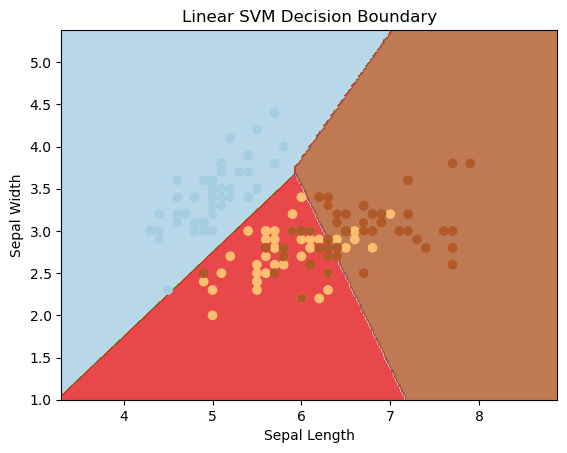

In [10]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict the labels for the meshgrid points
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Linear SVM Decision Boundary')
plt.show()

Bonus task: Implement a linear SVM classifier from scratch using Python and compare its performance with the scikit-learn implementation.

Accuracy (Scratch): 0.45


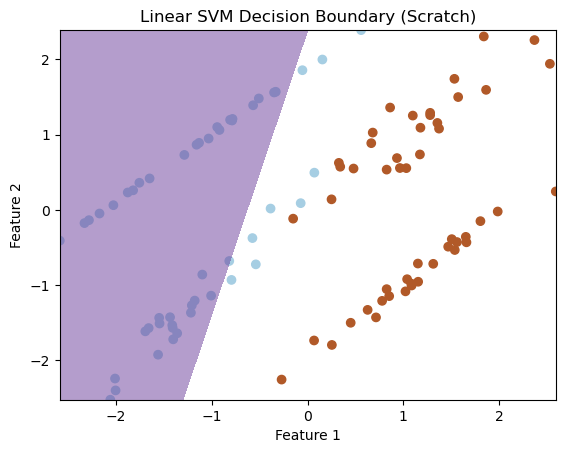

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement a simplified linear SVM from scratch
class LinearSVM:
    def __init__(self, learning_rate=0.01, num_epochs=1000):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.num_epochs):
            for i in range(n_samples):
                condition = y[i] * (np.dot(X[i], self.weights) - self.bias) >= 1
                if condition:
                    self.weights -= self.learning_rate * (2 * 1 / self.num_epochs * self.weights)
                else:
                    self.weights -= self.learning_rate * (2 * 1 / self.num_epochs * self.weights - np.dot(X[i], y[i]))
                    self.bias -= self.learning_rate * y[i]

    def decision_function(self, X):
        return np.dot(X, self.weights) - self.bias

    def predict(self, X):
        return np.sign(self.decision_function(X))

# Train a simplified linear SVM from scratch
clf = LinearSVM(learning_rate=0.01, num_epochs=1000)
clf.fit(X_train, y_train)

# Predict labels on the test set
y_pred_scratch = clf.predict(X_test)

# Compute accuracy using the scratch implementation
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
print("Accuracy (Scratch):", accuracy_scratch)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

# Plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 50),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.5, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linear SVM Decision Boundary (Scratch)')
plt.show()